In [2]:
import pandas as pd
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

## 종목간 상관관계 구하기

In [3]:
df = pd.read_excel("20210914.xlsx", index_col = 0)[['종목명', '종가', '시가총액']]
df['비중'] = df['시가총액'] / df['시가총액'].sum() * 100 #전체 시장에서 차지 비율
df.sort_values('비중', ascending = False)

,종목명,종가,시가총액,비중
종목코드,,,,
005930,삼성전자,76600,457285343330000,20.054103
000660,SK하이닉스,107500,78260254237500,3.432078
035420,NAVER,402500,66116016487500,2.899497
207940,삼성바이오로직스,913000,60408645000000,2.649202
005935,삼성전자우,71400,58754110380000,2.576643
...,...,...,...,...
001527,동양2우B,16550,5106816950,0.000224
002787,진흥기업2우B,16050,4731668400,0.000208
000547,흥국화재2우B,29500,4531200000,0.000199


In [6]:
kospi = fdr.DataReader("KOSPI")

1 001 2001-06-11 00:00:00 2003-06-10 00:00:00
1 001 2003-06-11 00:00:00 2005-06-10 00:00:00
1 001 2005-06-11 00:00:00 2007-06-10 00:00:00
1 001 2007-06-11 00:00:00 2009-06-10 00:00:00
1 001 2009-06-11 00:00:00 2011-06-10 00:00:00
1 001 2011-06-11 00:00:00 2013-06-10 00:00:00
1 001 2013-06-11 00:00:00 2015-06-10 00:00:00
1 001 2015-06-11 00:00:00 2017-06-10 00:00:00
1 001 2017-06-11 00:00:00 2019-06-10 00:00:00
1 001 2019-06-11 00:00:00 2021-06-10 00:00:00
1 001 2021-06-11 00:00:00 2023-06-10 00:00:00
1 001 2023-06-11 00:00:00 2025-06-10 00:00:00


In [7]:
samsung = fdr.DataReader('005930')

<Axes: xlabel='samsung', ylabel='kospi'>

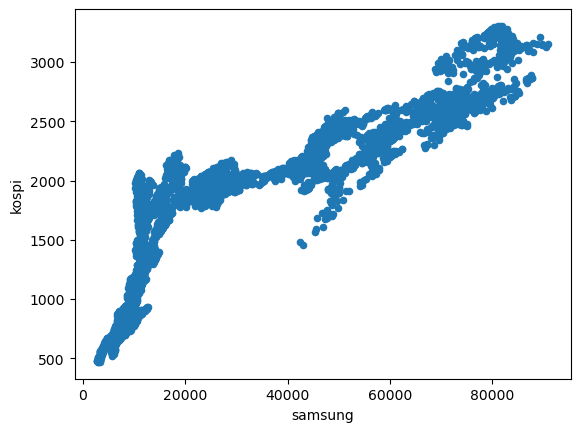

In [8]:
data = [kospi['Close'], samsung['Close']]

df = pd.concat(data, axis = 1, keys = ['kospi', 'samsung']).dropna()

df.plot.scatter(x = 'samsung', y = 'kospi')

In [9]:
#삼성 한정해서 kospi와의 상관관계 확인
df.corr()

,kospi,samsung
kospi,1.000000,0.873097
samsung,0.873097,1.000000


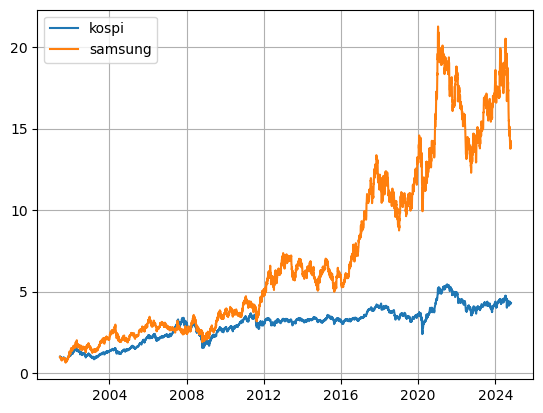

In [23]:
A = df['kospi'] / df['kospi'].iloc[0] #KOSPI 지수의 변동을 첫 번째 날짜를 기준으로 상대적인 변화 확인
B = df['samsung'] / df['samsung'].iloc[0]

plt.plot(A)
plt.plot(B)
plt.legend(['kospi', 'samsung'])
plt.grid()
plt.show()

#### 실습 : KOSPI 종목 중 SK하이닉스와 가장 상관관계가 높은 종목과 낮은 종목을 찾아보세요

In [12]:
import os

sk = pd.read_csv("KOSPI/SK하이닉스.csv")
sk['Date'] = pd.to_datetime(sk['Date'])
sk = sk.set_index("Date")
sk = sk['Close']

box = []
for i in os.listdir("KOSPI"):
    name = i.split('.')[0]
    df = pd.read_csv("KOSPI/" + i)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index("Date")
    df = df['Close']
    
    a = pd.concat([sk, df], axis = 1, keys = ['A', 'B']) #sk값과 KOSPI값 긁어온거 합치기
    corr = abs(a.corr().iloc[0, 1]) #상관값 확인
    box.append([name, corr])

In [16]:
result = pd.DataFrame(box, columns = ['Name', 'Corr']).sort_values("Corr")

#상관관계가 낮은 종목
print(result.iloc[0]) 

#상관관계가 높은 종목
print(result.iloc[-2]) #첫번째는 sk하이닉스이므로 2번째로 찍어봐야함

Name          국동
Corr    0.000098
Name: 214, dtype: object
Name       SK스퀘어
Corr    0.953233
Name: 160, dtype: object


In [30]:
kospi = fdr.DataReader('KOSPI')
kospi

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2001-06-11,612.46,615.41,607.20,608.23,340123834,-0.0218,2,-13.55,1711354887650,213769808029580
2001-06-12,605.36,611.88,603.91,607.15,319877548,-0.0018,2,-1.08,1579309434050,213407866089170
2001-06-13,611.79,614.05,607.48,614.05,392415108,0.0114,1,6.90,1882785913600,215722300556140
2001-06-14,612.96,623.37,610.36,613.75,420520519,-0.0005,2,-0.30,2138122210150,215864633350565
2001-06-15,609.54,618.96,604.37,618.96,375830101,0.0085,1,5.21,1984248114150,217830955673590
...,...,...,...,...,...,...,...,...,...,...
2024-10-15,2632.37,2635.32,2615.47,2633.45,438292799,0.0039,1,10.16,10054355841679,2147319522898363
2024-10-16,2606.70,2622.33,2601.35,2610.36,437552776,-0.0088,2,-23.09,10053097319299,2129276601242486
2024-10-17,2620.74,2622.71,2603.52,2609.30,331265227,-0.0004,2,-1.06,9953645240876,2127416627409576


### 종가 관련 수치

In [32]:
kospi['Close'].max(), kospi['Close'].min()

(3305.21, 468.76)

In [34]:
kospi['Close'].idxmax()

Timestamp('2021-07-06 00:00:00')

## 변동폭과 포인트 구하기

- 변동폭 상위 하위 5개 뽑는 법1

In [36]:
kospi['변동폭'] = kospi['Close'] - kospi['Close'].shift(1) #하루사이 변동폭

#가장 적게 빠졌을때와 많이 빠졌을 때
kospi.sort_values("변동폭").head(5)
kospi.sort_values("변동폭", ascending = False).head(5)

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap,변동폭
Date,,,,,,,,,,,
2023-11-06,2399.80,2502.37,2395.03,2502.37,528584832,0.0566,1,134.03,15225479879466,1991919718242366,134.03
2020-03-24,1523.69,1609.97,1508.68,1609.97,679288486,0.0860,1,127.51,10481447737237,1083695461251076,127.51
2021-01-08,3040.11,3161.11,3040.11,3152.18,1297903388,0.0397,1,120.50,40909490005818,2170537648432200,120.50
2008-10-30,1036.83,1094.89,992.89,1084.72,621627912,0.1195,1,115.75,7404484242302,551937615919930,115.75
2020-03-20,1498.49,1566.82,1466.48,1566.15,817021497,0.0744,1,108.51,10632970114698,1054892888467243,108.51


- 변동폭 상위 하위 5개 뽑는 법2

In [43]:
kospi["변동폭"].nlargest(5)
kospi["변동폭"].nsmallest(5)

Date
2024-08-05   -234.64
2020-03-19   -133.56
2008-10-16   -126.50
2007-08-16   -125.91
2011-08-19   -115.70
Name: 변동폭, dtype: float64

- 복습 : 코스피 월별 정리

In [46]:
kospi2 = kospi.reset_index()

In [48]:
how = {'Open' : "first", "Close" : "last", "High" : "max", "Low" : "min", "Volume" : "sum"}

kospi2.groupby(pd.Grouper(key = "Date", freq = "MS")).agg(how)

,Open,Close,High,Low,Volume
Date,,,,,
2001-06-01,612.46,595.13,623.37,580.75,5446455108
2001-07-01,593.03,541.55,600.51,512.78,5648159306
2001-08-01,546.30,545.11,585.36,542.00,9651657964
2001-09-01,545.02,479.68,559.17,463.54,12162080702
2001-10-01,498.87,537.81,550.93,493.12,10307000081
...,...,...,...,...,...
2024-06-01,2657.81,2797.82,2812.62,2657.81,12186078882
2024-07-01,2792.96,2770.69,2896.43,2703.86,10790451115
2024-08-01,2787.27,2674.31,2794.11,2386.96,8692883404


- 언제 첫 포인트를 달성했는지 변동폭 구한거 사용해서 구해보기

In [51]:
box = []
for i in range(2000, 3400, 100):
    cond = kospi['Close'] >= i
    box.append([f"{i} 포인트 돌파!",
               kospi.index[cond][0], kospi.loc[cond, "Close"].iloc[0]])

pd.DataFrame(box, columns = ['이벤트', '일자', '지수'])

,이벤트,일자,지수
0,2000 포인트 돌파!,2007-07-25,2004.22
1,2100 포인트 돌파!,2011-01-14,2108.17
2,2200 포인트 돌파!,2011-04-25,2216.00
3,2300 포인트 돌파!,2017-05-22,2304.03
4,2400 포인트 돌파!,2017-07-13,2409.49
5,2500 포인트 돌파!,2017-10-30,2501.93
6,2600 포인트 돌파!,2020-11-23,2602.59
7,2700 포인트 돌파!,2020-12-04,2731.45
8,2800 포인트 돌파!,2020-12-24,2806.86
9,2900 포인트 돌파!,2021-01-04,2944.45


## 낙폭

In [53]:
#코스피 기간 수익률
rate = kospi.iloc[-1, 3] / kospi.iloc[0,3]
rate = (rate - 1) * 100
rate

329.97385857323707

In [59]:
#연 복리 수익률
diff = kospi.index[-1] - kospi.index[0]
year = diff.days / 365

cagr = rate ** (1/year) - 1
cagr

0.2815284002557601

In [63]:
#최대 낙폭 계산하기
kospi = fdr.DataReader("005930")
kospi['전고점'] = kospi['Close'].cummax()

##낙폭 : Drawdown
kospi['DD'] = (kospi['Close'] / kospi['전고점']) * 100
kospi

,Open,High,Low,Close,Volume,Change,전고점,DD
Date,,,,,,,,
2000-06-28,7220,7540,7220,7520,945903,NaN,7520,100.000000
2000-06-29,7600,7739,7380,7490,1222497,-0.003989,7520,99.601064
2000-06-30,7439,7540,7290,7380,705080,-0.014686,7520,98.138298
2000-07-03,7440,7550,7420,7500,519515,0.016260,7520,99.734043
2000-07-04,7600,7620,7350,7350,656229,-0.020000,7520,97.739362
...,...,...,...,...,...,...,...,...
2024-10-15,61100,61400,60100,61000,22715239,0.003289,91000,67.032967
2024-10-16,59400,60000,59200,59500,23303268,-0.024590,91000,65.384615
2024-10-17,59400,60100,59100,59700,23372873,0.003361,91000,65.604396


In [67]:
#낙폭 중 가장 큰 낙폭
MDD = kospi['DD'].max()
MDD

100.0

<function matplotlib.pyplot.show(close=None, block=None)>

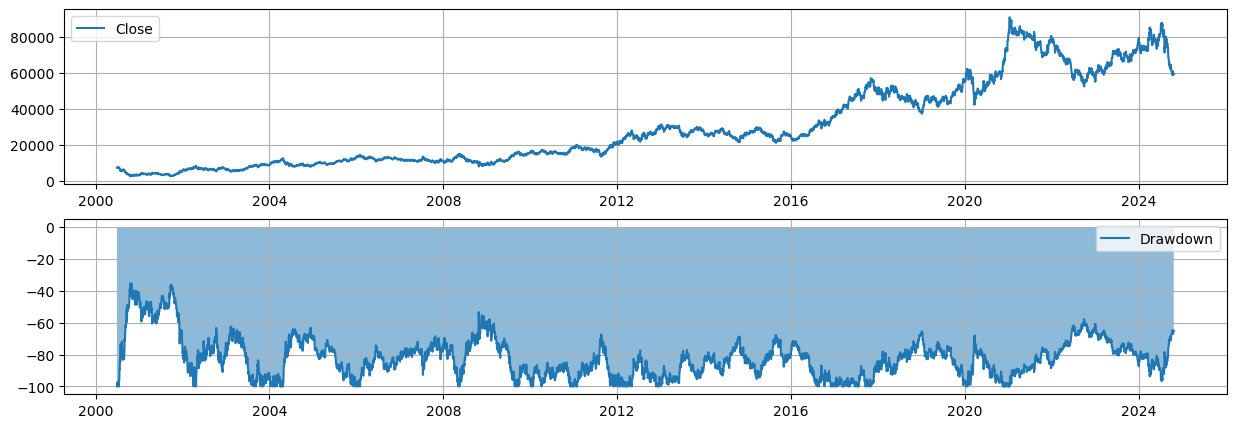

In [147]:
fig = plt.figure(figsize = (15,5))

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(kospi.index, kospi['Close'], label = "Close")
ax2.plot(kospi.index, kospi['DD'] * -1, label = "Drawdown")
    #드로우다운은 특정 고점에서 얼마나 하락했는지
    # * -1 : 드로우다운 값을 양수로 변환하여 하락폭 확인할 수 있게함 
ax2.fill_between(kospi.index, kospi['DD'] * -1, alpha = 0.5) #fill_between() 함수는 두 곡선 사이의 영역을 색칠하는 데 사용

ax1.grid()
ax2.grid()

ax1.legend()
ax2.legend()

plt.show